In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

COLUMN_NAMES = ["size", "num_float_64_sent", "time(s)"]

In [2]:
# Load python benchmarks

send_benchmark_python = pd.read_csv("../basic-benchmarks-condensed/python-n6-sendbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_python_2 = pd.read_csv("../basic-benchmarks-condensed/python-n2-broadcastbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_python_4 = pd.read_csv("../basic-benchmarks-condensed/python-n4-broadcastbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_python_6 = pd.read_csv("../basic-benchmarks-condensed/python-n6-broadcastbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_python_8 = pd.read_csv("../basic-benchmarks-condensed/python-n8-broadcastbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_python_10 = pd.read_csv("../basic-benchmarks-condensed/python-n10-broadcastbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_python_12 = pd.read_csv("../basic-benchmarks-condensed/python-n12-broadcastbenchmark.csv", names=COLUMN_NAMES)

python_broadcasts = [broadcast_benchmark_python_2, broadcast_benchmark_python_4, broadcast_benchmark_python_6, broadcast_benchmark_python_8, broadcast_benchmark_python_10, broadcast_benchmark_python_12]

In [3]:
#  Load C benchmarks

send_benchmark_c = pd.read_csv("../basic-benchmarks-condensed/c-n6-sendbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_c_2 = pd.read_csv("../basic-benchmarks-condensed/c-n2-broadcastbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_c_4 = pd.read_csv("../basic-benchmarks-condensed/c-n4-broadcastbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_c_6 = pd.read_csv("../basic-benchmarks-condensed/c-n6-broadcastbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_c_8 = pd.read_csv("../basic-benchmarks-condensed/c-n8-broadcastbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_c_10 = pd.read_csv("../basic-benchmarks-condensed/c-n10-broadcastbenchmark.csv", names=COLUMN_NAMES)
broadcast_benchmark_c_12 = pd.read_csv("../basic-benchmarks-condensed/c-n12-broadcastbenchmark.csv", names=COLUMN_NAMES)

c_broadcasts = [broadcast_benchmark_c_2, broadcast_benchmark_c_4, broadcast_benchmark_c_6, broadcast_benchmark_c_8, broadcast_benchmark_c_10, broadcast_benchmark_c_12]

Python Slope (s/MB): 0.026023843358753476
MB/s: 38.426299536714524
Python Intercept (s): 0.0001491291563160968
Python R-squared: 0.9999998513005779
Python P-value: 3.862017174964514e-97
Python Standard Error: 1.8964748739216978e-06

C Slope (s/MB): 0.021209684293611822
MB/s: 47.148273692182755
C Intercept (s): -0.0038078558035948007
C R-squared: 0.9996310290662824
C P-value: 1.2955351653380158e-49
C Standard Error: 7.700721227382503e-05


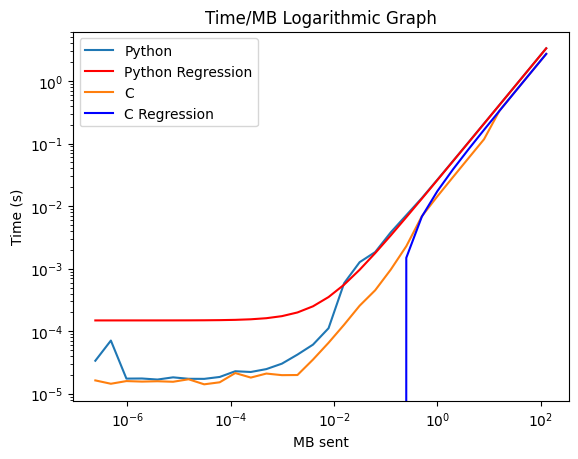

In [21]:
# the python time/MB sent

floats_communicated_python = np.array(send_benchmark_python["num_float_64_sent"] / 8 / 1024 / 1024)
time_python = np.array(send_benchmark_python["time(s)"])


plt.plot(floats_communicated_python, time_python, label="Python")

slope_python, intercept_python, r_value_python, p_value_python, std_err_python = stats.linregress(floats_communicated_python, time_python)
plt.plot(floats_communicated_python, intercept_python + slope_python * floats_communicated_python, linestyle='-', color='red', label='Python Regression')

print(f"Python Slope (s/MB): {slope_python}")
print(f"MB/s: {1/slope_python}")
print(f"Python Intercept (s): {intercept_python}")
print(f"Python R-squared: {r_value_python**2}")
print(f"Python P-value: {p_value_python}")
print(f"Python Standard Error: {std_err_python}")
print()

# C stuff for sending

floats_communicated_c = np.array(send_benchmark_c["num_float_64_sent"] / 8 / 1024 / 1024)
time_c = np.array(send_benchmark_c["time(s)"])

plt.plot(floats_communicated_c, time_c, label="C")

slope_c, intercept_c, r_value_c, p_value_c, std_err_c = stats.linregress(floats_communicated_c, time_c)
plt.plot(floats_communicated_c, intercept_c + slope_c * floats_communicated_c, linestyle='-', color='blue', label='C Regression')

print(f"C Slope (s/MB): {slope_c}")
print(f"MB/s: {1/slope_c}")
print(f"C Intercept (s): {intercept_c}")
print(f"C R-squared: {r_value_c**2}")
print(f"C P-value: {p_value_c}")
print(f"C Standard Error: {std_err_c}")

plt.xlabel("MB sent")
plt.xscale("log")
plt.ylabel("Time (s)")
plt.yscale("log")
plt.title("Time/MB Logarithmic Graph")

plt.legend()

plt.show()



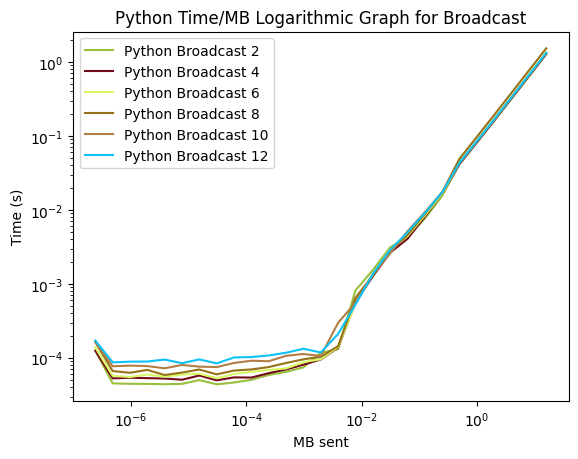

In [24]:
# python broadcasts

plt.xlabel("MB sent")
plt.xscale("log")
plt.ylabel("Time (s)")
plt.yscale("log")
plt.title("Python Time/MB Logarithmic Graph for Broadcast")

for broadcast_data in python_broadcasts:
    plt.plot(np.array(broadcast_data["num_float_64_sent"] / 8 / 1024 / 1024), np.array(broadcast_data["time(s)"]), color=np.random.rand(3,), label=f"Python Broadcast {broadcast_data['size'][0]}")     

plt.legend()

plt.show()
    

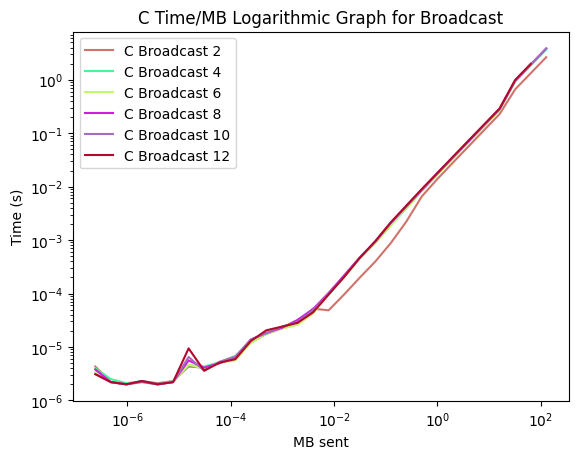

In [25]:
# C broadcasts

plt.xlabel("MB sent")
plt.xscale("log")
plt.ylabel("Time (s)")
plt.yscale("log")
plt.title("C Time/MB Logarithmic Graph for Broadcast")

for broadcast_data in c_broadcasts:
    plt.plot(np.array(broadcast_data["num_float_64_sent"] / 8 / 1024 / 1024), np.array(broadcast_data["time(s)"]), color=np.random.rand(3,), label=f"C Broadcast {broadcast_data['size'][0]}")     

plt.legend()

plt.show()
    

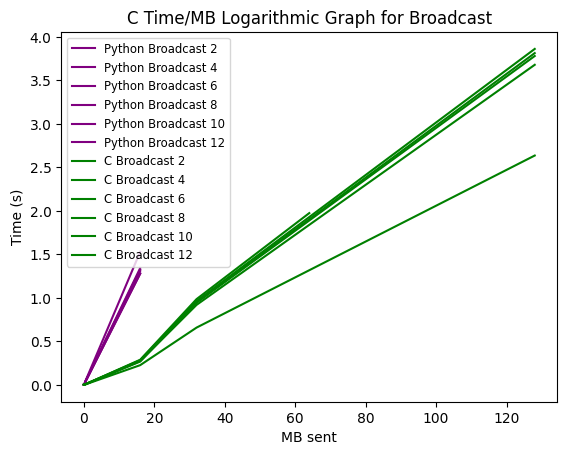

In [28]:
# C broadcast vs Python Broadcast

plt.xlabel("MB sent")
# plt.xscale("log")
plt.ylabel("Time (s)")
# plt.yscale("log")
plt.title("C Time/MB Logarithmic Graph for Broadcast")

for broadcast_data in python_broadcasts:
    plt.plot(np.array(broadcast_data["num_float_64_sent"] / 8 / 1024 / 1024), np.array(broadcast_data["time(s)"]), color="purple", label=f"Python Broadcast {broadcast_data['size'][0]}")     

for broadcast_data in c_broadcasts:
    plt.plot(np.array(broadcast_data["num_float_64_sent"] / 8 / 1024 / 1024), np.array(broadcast_data["time(s)"]), color="green", label=f"C Broadcast {broadcast_data['size'][0]}")     

plt.legend(fontsize="small")

plt.show()